In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.base import clone


data=pd.read_csv('../../../Sherry-K/data/diabetic_data.csv')

In [61]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [62]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [63]:
data = data.replace("?", np.NaN)

In [103]:
data.diag_1.value_counts()

428       6862
414       6581
786       4016
410       3614
486       3508
427       2766
491       2275
715       2151
682       2042
434       2028
780       2019
996       1967
276       1889
38        1688
250.8     1680
599       1595
584       1520
V57       1207
250.6     1183
518       1115
820       1082
577       1057
493       1056
435       1016
562        989
574        965
296        896
560        876
250.7      871
250.13     851
          ... 
318          1
375          1
839          1
955          1
906          1
207          1
605          1
61           1
216          1
217          1
219          1
939          1
919          1
412          1
915          1
911          1
903          1
84           1
895          1
640          1
885          1
649          1
391          1
870          1
250.51       1
389          1
381          1
671          1
842          1
10           1
Name: diag_1, Length: 716, dtype: int64

In [64]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [65]:
data.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [66]:
data['readmitted'][data['readmitted']=='<30'] = 1
data['readmitted'][data['readmitted']!= 1] = 0
data.readmitted = data.readmitted.astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
numerical_var = list(data.select_dtypes(include = 'int64').columns)
print(numerical_var) 
numerical_var = numerical_var[5:]
print(numerical_var) 
len(numerical_var)

['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']


9

In [68]:
data.readmitted.dtype

dtype('int64')

In [72]:
cat_var = list(data.select_dtypes(include = 'object').columns)
cat_var

['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [95]:
for var in cat_var:
    data[var] = data[var].astype('category')

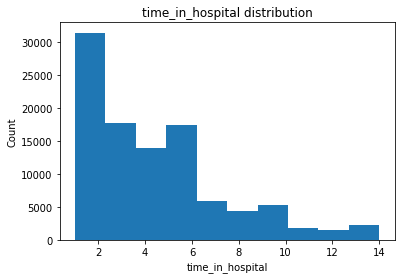

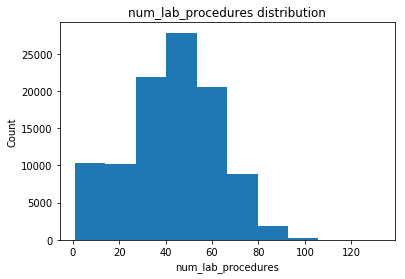

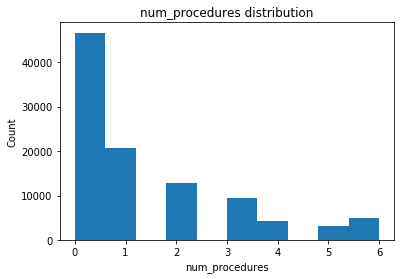

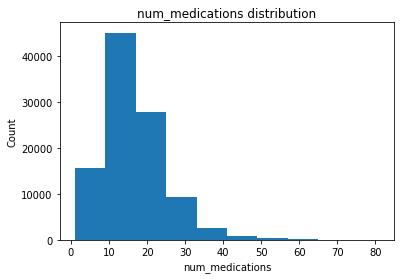

In [101]:
plot_number = 1
for var in numerical_var[:4]:
    plt.hist(x=data[var])
    ax.grid(linewidth=0.25)
    ax.set_title(var)
    plt.title(var +' distribution')
    plt.xlabel(var )
    plt.ylabel('Count')
    # Go to the next plot for the next loop
    plt.show()
#plt.savefig('boxplot_categorical.png')

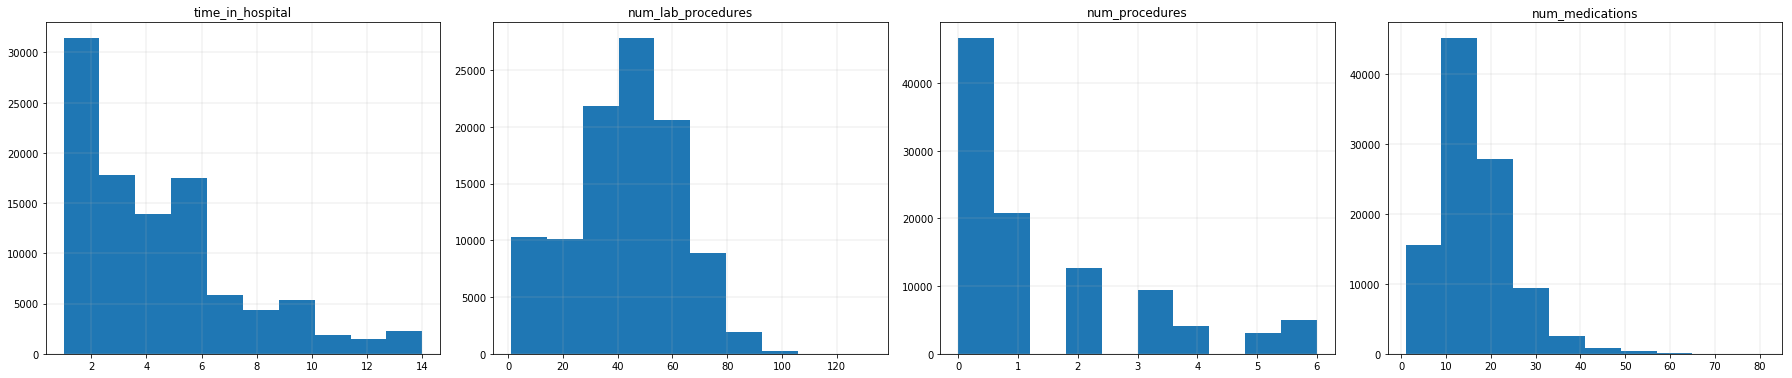

In [85]:
## checking distribution of 

plt.figure(figsize=(25,70))

plot_number = 1
for var in numerical_var[:4]:
    
    ax = plt.subplot(14, 4, plot_number)
    plt.hist(x=data[var])
    ax.grid(linewidth=0.25)
    ax.set_title(var)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()
#plt.savefig('boxplot_categorical.png')

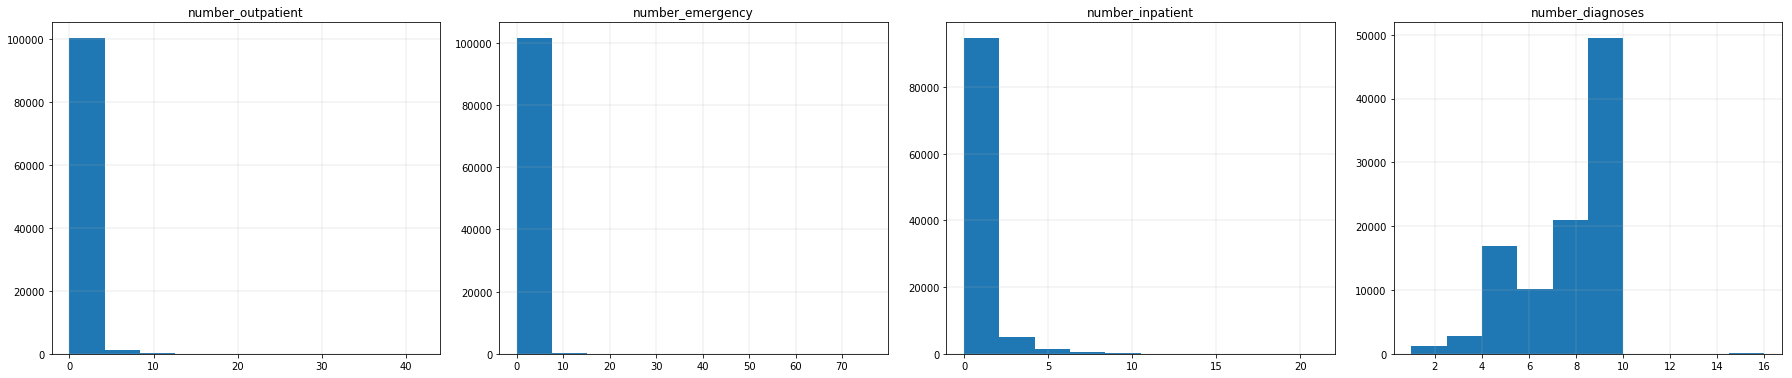

In [87]:
plt.figure(figsize=(25,70))

plot_number = 1
for var in numerical_var[4:-1]:
    
    ax = plt.subplot(14, 4, plot_number)
    plt.hist(x=data[var])
    ax.grid(linewidth=0.25)
    ax.set_title(var)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()
#plt.savefig('boxplot_categorical.png')

In [54]:
for x in list(data.columns):
    print(data[x].value_counts())

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
            ..
249722520    1
111830682    1
126506652    1
80193186     1
186881700    1
147162726    1
263120844    1
249665124    1
151295556    1
113303472    1
73909806     1
422050106    1
13655088     1
168523320    1
296140568    1
98784828     1
157333056    1
280536642    1
130655706    1
190162530    1
107017800    1
103828530    1
176744010    1
172279374    1
297285200    1
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64
88785891     40
43140906     28
2319

No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
No        101765
Steady         1
Name: acetohexamide, dtype: int64
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64
No        101743
Steady        23
Name: tolbutamide, dtype: int64
No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64
No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64
No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64
No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64
No        101763
Steady         3
Name: troglitazone, dtype: int64
No        101727
Steady

In [55]:
for x in list(data.columns):
    print(data.groupby('readmitted')[x].value_counts())

readmitted  encounter_id
0           12522           1
            15738           1
            16680           1
            28236           1
            35754           1
            42570           1
            55842           1
            62256           1
            63768           1
            64410           1
            73578           1
            84222           1
            89682           1
            148530          1
            149190          1
            150006          1
            150048          1
            182796          1
            183930          1
            216156          1
            221634          1
            236316          1
            248916          1
            250872          1
            252822          1
            253380          1
            253722          1
            260166          1
            293058          1
            293118          1
                           ..
1           438536570       1
            438

readmitted  payer_code
0           MC            28629
            HM             5630
            SP             4497
            BC             4229
            MD             3116
            CP             2319
            UN             2221
            CM             1739
            OG              897
            PO              548
            DM              485
            CH              133
            WC              130
            OT               88
            MP               70
            SI               48
            FR                1
1           MC             3810
            HM              644
            SP              510
            BC              426
            MD              416
            UN              227
            CP              214
            CM              198
            OG              136
            DM               64
            PO               44
            CH               13
            MP                9
            OT   

readmitted  diag_3
0           250       10571
            401        7601
            276        4572
            428        4017
            427        3496
            414        3326
            496        2255
            403        1972
            272        1834
            599        1702
            585        1656
            V45        1257
            250.02     1189
            780        1185
            707        1158
            285        1073
            425        1005
            424         954
            250.6       888
            305         844
            584         836
            250.01      802
            682         774
            518         748
            41          669
            278         629
            493         620
            530         570
            786         524
            491         507
                      ...  
1           934           1
            94            1
            945           1
            958           1
 

readmitted  glimepiride-pioglitazone
0           No                          90408
            Steady                          1
1           No                          11357
Name: glimepiride-pioglitazone, dtype: int64
readmitted  metformin-rosiglitazone
0           No                         90407
            Steady                         2
1           No                         11357
Name: metformin-rosiglitazone, dtype: int64
readmitted  metformin-pioglitazone
0           No                        90408
            Steady                        1
1           No                        11357
Name: metformin-pioglitazone, dtype: int64
readmitted  change
0           No        48956
            Ch        41453
1           No         5799
            Ch         5558
Name: change, dtype: int64
readmitted  diabetesMed
0           Yes            69252
            No             21157
1           Yes             9111
            No              2246
Name: diabetesMed, dtype: int64
readmitte